# Quantifying Growth variability

In [36]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from ipywidgets import interact, widgets
from IPython.display import display
import branca.colormap as cm
from shapely import wkt

In [37]:
#import data
df = pd.read_csv(r'c:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\output\basis_for_growth_stability.csv')

In [38]:
df.columns

Index(['Unnamed: 0.1', 'OBJECTID', 'CUL_CAMPAN', 'CUL_ID_x', 'OSA_ID',
       'Shape_Leng', 'Shape_Area', 'layer', 'path', 'geometry', 'Unnamed: 0',
       'CUL_ID_y', 'year', 'auc', 'gdd', 'ndvi', 'doy', 'percentile', 'status',
       'pct_diff_from_P80_avg', 'pct_diff_from_P95_avg'],
      dtype='object')

In [39]:
df['geometry'] = df['geometry'].apply(wkt.loads)
df = gpd.GeoDataFrame(df, geometry='geometry')
df.set_crs("EPSG:4326", inplace=True)


,Unnamed: 0.1,OBJECTID,CUL_CAMPAN,CUL_ID_x,OSA_ID,Shape_Leng,Shape_Area,layer,path,geometry,...,CUL_ID_y,year,auc,gdd,ndvi,doy,percentile,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg
0,0,3669309,2024,4713957,44435742,512.973081,14180.875725,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.18953 39.8903, -7.18952 39....",...,4713957,2019,588.516757,[2.76291555e+00 4.08390350e+00 5.42935321e+00 ...,[0.36498862 0.36729941 0.37192097 0.37419841 0...,"Index([ 32, 33, 35, 36, 37, 38, 39, 40,...",1.0,non-bearing,-71.692999,-75.615116
1,1,3669309,2024,4713957,44435742,512.973081,14180.875725,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.18953 39.8903, -7.18952 39....",...,4713957,2020,670.758146,[ 9.30395851 17.41073786 24.87887332 3...,[0.36283503 0.36558482 0.36833461 0.3710844 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",3.0,non-bearing,-67.737279,-72.207487
2,2,3669309,2024,4713957,44435742,512.973081,14180.875725,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.18953 39.8903, -7.18952 39....",...,4713957,2021,1247.121858,[ 7.7562856 14.98012911 21.56475207 2...,[0.3229655 0.32367205 0.3243786 0.32508516 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",42.0,non-bearing,-40.014826,-48.326157
3,3,3669309,2024,4713957,44435742,512.973081,14180.875725,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.18953 39.8903, -7.18952 39....",...,4713957,2022,1772.711868,[ 5.91835175 11.64991811 16.86310527 2...,[0.3280025 0.3277233 0.3274441 0.3271649 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",76.0,bearing,-14.734531,-26.548610
4,4,3669309,2024,4713957,44435742,512.973081,14180.875725,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.18953 39.8903, -7.18952 39....",...,4713957,2023,1764.280498,[9.83590062e-01 2.58705889e+00 5.51611595e+00 ...,[0.48158852 0.4747923 0.46799609 0.46334206 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",75.0,bearing,-15.140071,-26.897959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,2956,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,6433929,2021,1136.295767,[ 7.7562856 14.98012911 21.56475207 2...,[0.75833797 0.75883167 0.75932538 0.75981908 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",32.0,non-bearing,-45.345438,-52.918178
2957,2957,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,6433929,2022,1182.389316,[ 5.91835175 11.64991811 16.86310527 2...,[0.44818715 0.44920113 0.45021511 0.45122909 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",36.0,non-bearing,-43.128389,-51.008316
2958,2958,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,6433929,2023,1485.442518,[9.83590062e-01 2.58705889e+00 5.51611595e+00 ...,[0.80115084 0.78948681 0.77782278 0.77369963 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",58.0,non-bearing,-28.551867,-38.451465
2959,2959,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,6433929,2024,1833.550564,[ 6.50548452 13.01491979 18.94146741 2...,[0.65595098 0.65335643 0.65076189 0.6520124 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",79.0,bearing,-11.808257,-24.027790


In [40]:
print(type(df))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [41]:
df['Growth variability [%]'] = df['pct_diff_from_P95_avg']

df['Growth variability [%]'] = df['Growth variability [%]'].where(df['Growth variability [%]']<0,0)

df['Growth variability [%]'] = df['pct_diff_from_P95_avg'].where(df['status']!='non-bearing','non-bearing')

df['Growth variability [%]'] 

df

,Unnamed: 0.1,OBJECTID,CUL_CAMPAN,CUL_ID_x,OSA_ID,Shape_Leng,Shape_Area,layer,path,geometry,...,year,auc,gdd,ndvi,doy,percentile,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%]
0,0,3669309,2024,4713957,44435742,512.973081,14180.875725,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.18953 39.8903, -7.18952 39....",...,2019,588.516757,[2.76291555e+00 4.08390350e+00 5.42935321e+00 ...,[0.36498862 0.36729941 0.37192097 0.37419841 0...,"Index([ 32, 33, 35, 36, 37, 38, 39, 40,...",1.0,non-bearing,-71.692999,-75.615116,non-bearing
1,1,3669309,2024,4713957,44435742,512.973081,14180.875725,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.18953 39.8903, -7.18952 39....",...,2020,670.758146,[ 9.30395851 17.41073786 24.87887332 3...,[0.36283503 0.36558482 0.36833461 0.3710844 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",3.0,non-bearing,-67.737279,-72.207487,non-bearing
2,2,3669309,2024,4713957,44435742,512.973081,14180.875725,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.18953 39.8903, -7.18952 39....",...,2021,1247.121858,[ 7.7562856 14.98012911 21.56475207 2...,[0.3229655 0.32367205 0.3243786 0.32508516 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",42.0,non-bearing,-40.014826,-48.326157,non-bearing
3,3,3669309,2024,4713957,44435742,512.973081,14180.875725,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.18953 39.8903, -7.18952 39....",...,2022,1772.711868,[ 5.91835175 11.64991811 16.86310527 2...,[0.3280025 0.3277233 0.3274441 0.3271649 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",76.0,bearing,-14.734531,-26.548610,-26.54861
4,4,3669309,2024,4713957,44435742,512.973081,14180.875725,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.18953 39.8903, -7.18952 39....",...,2023,1764.280498,[9.83590062e-01 2.58705889e+00 5.51611595e+00 ...,[0.48158852 0.4747923 0.46799609 0.46334206 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",75.0,bearing,-15.140071,-26.897959,-26.897959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,2956,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,2021,1136.295767,[ 7.7562856 14.98012911 21.56475207 2...,[0.75833797 0.75883167 0.75932538 0.75981908 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",32.0,non-bearing,-45.345438,-52.918178,non-bearing
2957,2957,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,2022,1182.389316,[ 5.91835175 11.64991811 16.86310527 2...,[0.44818715 0.44920113 0.45021511 0.45122909 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",36.0,non-bearing,-43.128389,-51.008316,non-bearing
2958,2958,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,2023,1485.442518,[9.83590062e-01 2.58705889e+00 5.51611595e+00 ...,[0.80115084 0.78948681 0.77782278 0.77369963 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",58.0,non-bearing,-28.551867,-38.451465,non-bearing
2959,2959,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,2024,1833.550564,[ 6.50548452 13.01491979 18.94146741 2...,[0.65595098 0.65335643 0.65076189 0.6520124 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",79.0,bearing,-11.808257,-24.027790,-24.02779


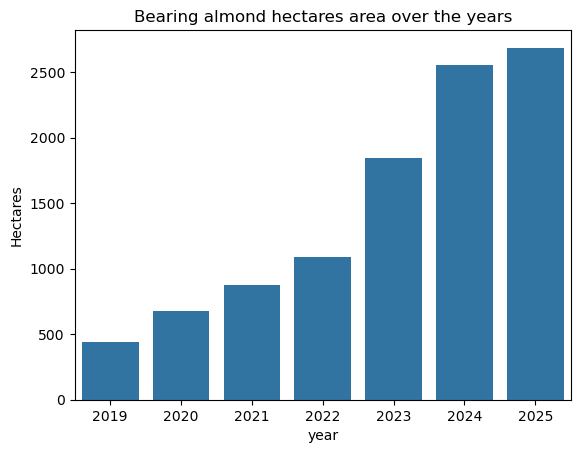

year
2019     440.604490
2020     676.004914
2021     872.071832
2022    1088.514604
2023    1845.915669
2024    2558.055300
2025    2687.118498
Name: Shape_Area, dtype: float64


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# check the evolution of bearing / non-bearing
df_bearing = df[df['status']=='bearing']
test = df_bearing.groupby('year')['Shape_Area'].sum() /10000

sns.barplot(data=test)
plt.ylabel('Hectares')
plt.title('Bearing almond hectares area over the years')
plt.show()

print(test)

In [8]:

df['doy'] = pd.to_numeric(df['doy'], errors='coerce')  # converts to float, NaN on failure
df['gdd'] = pd.to_numeric(df['gdd'], errors='coerce')
df['ndvi'] = pd.to_numeric(df['ndvi'], errors='coerce')
#df['Growth variability'] = pd.to_numeric(df['ndvi'], errors='coerce')

df['status'] = df['status'].astype(str)


# Drop columns not needed in GeoJson
columns_to_drop = ['layer', 'path']
df_new = df.drop(columns=columns_to_drop)

df_new['year'].unique()

array([2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype=int64)

In [9]:
df_new

,Unnamed: 0.1,OBJECTID,CUL_CAMPAN,CUL_ID_x,OSA_ID,Shape_Leng,Shape_Area,geometry,Unnamed: 0,CUL_ID_y,year,auc,gdd,ndvi,doy,percentile,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%]
0,0,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",454,6207146,2019,802.833826,NaN,NaN,NaN,10.0,non-bearing,-59.523128,-66.236241,non-bearing
1,1,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",271,6207146,2020,715.156919,NaN,NaN,NaN,6.0,non-bearing,-63.943578,-69.923557,non-bearing
2,2,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",528,6207146,2021,828.386356,NaN,NaN,NaN,11.0,non-bearing,-58.234834,-65.161611,non-bearing
3,3,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",1560,6207146,2022,1105.964848,NaN,NaN,NaN,33.0,non-bearing,-44.240021,-53.487846,non-bearing
4,4,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2133,6207146,2023,1220.040400,NaN,NaN,NaN,45.0,non-bearing,-38.488617,-48.690316,non-bearing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,4756,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",1735,6433929,2021,1136.295767,NaN,NaN,NaN,36.0,non-bearing,-42.710812,-52.212257,non-bearing
4757,4757,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",1964,6433929,2022,1182.389316,NaN,NaN,NaN,41.0,non-bearing,-40.386891,-50.273760,non-bearing
4758,4758,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",3027,6433929,2023,1485.442518,NaN,NaN,NaN,64.0,bearing,-25.107707,-37.528637,-37.528637
4759,4759,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",4046,6433929,2024,1833.550564,NaN,NaN,NaN,85.0,bearing,-7.556971,-22.888701,-22.888701


In [10]:
float_rows = df_new['Growth variability [%]'][df_new['Growth variability [%]'].apply(lambda x: isinstance(x, float))]

type(float_rows.iloc[0])

float

,Unnamed: 0.1,OBJECTID,CUL_CAMPAN,CUL_ID_x,OSA_ID,Shape_Leng,Shape_Area,geometry,Unnamed: 0,CUL_ID_y,year,auc,gdd,ndvi,doy,percentile,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%]
0,0,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",1044,6207146,2018,923.572266,NaN,NaN,NaN,21.0,non-bearing,-50.177364,-59.659051,non-bearing
1,1,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",591,6207146,2019,802.833826,NaN,NaN,NaN,12.0,non-bearing,-56.690668,-64.932816,non-bearing
2,2,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",363,6207146,2020,715.156919,NaN,NaN,NaN,7.0,non-bearing,-61.420450,-68.762478,non-bearing
3,3,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",676,6207146,2021,828.386356,NaN,NaN,NaN,13.0,non-bearing,-55.312223,-63.816701,non-bearing
4,4,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",1992,6207146,2022,1105.964848,NaN,NaN,NaN,39.0,non-bearing,-40.338091,-51.692279,non-bearing


# Growth Variability

Use the following script to visualize growth variability.

In [12]:
# Your GeoDataFrame must have these columns
# - 'geometry' (valid geometries)
# - 'year'
# - 'pct_diff_from_P95_avg'

from folium import Element
import json
import numpy as np
import branca.colormap as cm

# Get center of map from entire dataset
centroids = df_new.geometry.centroid
lat = centroids.y.mean()
lon = centroids.x.mean()

# Create base map
m = folium.Map(location=[lat, lon], zoom_start=13, tiles="CartoDB positron")

# Ensure 'Growth variability [%]' is numeric
df_new['Growth variability [%]'] = pd.to_numeric(
    df_new['Growth variability [%]'], errors='coerce'
)

# Extract values for colormap
values = df_new['Growth variability [%]'].dropna()

# Choose quantile breakpoints (example: 5 quantiles)
quantiles = list(values.quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values)

# Create quantile-based colormap
colormap = cm.StepColormap(
    colors=cm.linear.RdYlGn_11.colors,  # reuse RdYlGn palette
    index=quantiles,
    vmin=min(quantiles),
    vmax=max(quantiles)
)

colormap.caption = "Growth variability [%]"
colormap.add_to(m)

# Dictionary to keep layers by year
year_layers = {}

for year in sorted(df_new['year'].unique()):
    filtered = df_new[df_new['year'] == year]

    print(f"Year: {year}, Features: {len(filtered)}")

    layer = folium.FeatureGroup(name=str(year), show=False)

    geojson_data = json.loads(filtered.to_json())  # Ensures correct format

    folium.GeoJson(
        data=geojson_data,
        name=f"Fields {year}",
        style_function=lambda feature: {
            'fillColor': colormap(feature['properties']['Growth variability [%]'])
            if isinstance(feature['properties']['Growth variability [%]'], (int, float, np.number))
            else 'white',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=["Growth variability [%]"])
    ).add_to(layer)

    # Add this:
    layer.add_to(m)
    year_layers[year] = layer

# Activate only the first year
first_year = sorted(year_layers.keys())[0]
m.add_child(year_layers[first_year])
#year_layers[first_year].show = True

# Layer control
folium.LayerControl(collapsed=False).add_to(m)

# Create the dropdown HTML separately
dropdown_options = ''.join([f'<option value="{year}">{year}</option>' for year in sorted(year_layers.keys())])

dropdown_script = """
<select id="yearDropdown" onchange="switchYear(this.value)"
        style="position: fixed; top: 10px; left: 50px; z-index: 9999;">
  {options}
</select>

<script>
    function switchYear(year) {{
        const yearLayers = {years};
        map.eachLayer(function(layer) {{
            if (layer.options && layer.options.name && yearLayers.includes(layer.options.name)) {{
                if (layer.options.name === year) {{
                    map.addLayer(layer);
                }} else {{
                    map.removeLayer(layer);
                }}
            }}
        }});
    }}
</script>
""".format(
    options=dropdown_options,
    years=str([str(y) for y in year_layers.keys()])  # safely embed year list as JS array
)

# Add to map
m.get_root().html.add_child(Element(dropdown_script))
m.save(r"C:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\HTML\growth_var2.html")


C:\Users\ici-1\AppData\Local\Temp\ipykernel_7532\1535714401.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = df_new.geometry.centroid


Year: 2019, Features: 723
Year: 2020, Features: 723
Year: 2021, Features: 723
Year: 2022, Features: 723
Year: 2023, Features: 723
Year: 2024, Features: 723
Year: 2025, Features: 423


## Year to year difference

In [16]:
# get year to year difference

# assuming df is your dataframe
df_new_diff = df_new[['CUL_ID_y', 'year', 'auc', 'geometry', 'status']].copy()

# sort by ID and year
df_new_diff = df_new_diff.sort_values(by=['CUL_ID_y', 'year'])

# group by ID and compute difference and percent change
df_new_diff['auc_diff'] = df_new_diff.groupby('CUL_ID_y')['auc'].diff()
df_new_diff['auc_pct_change'] = df_new_diff.groupby('CUL_ID_y')['auc'].pct_change() * 100

df_new_diff['auc_pct_change'] = df_new_diff['auc_pct_change'].where(df['status']!='non-bearing','non-bearing')



In [17]:


#float_rows = df_new_diff['auc_pct_change'][df_new_diff['auc_pct_change'].apply(lambda x: isinstance(x, float))]
df_new_diff['auc_pct_change']= df_new_diff['auc_pct_change'][df_new_diff['auc_pct_change'].apply(lambda x: isinstance(x, float))]


In [18]:
df_new_diff['auc_pct_change_capped'] = np.where(
    (df_new_diff['status'] != 'non-bearing') & df_new_diff['auc_pct_change'].notna(),
    df_new_diff['auc_pct_change'].clip(-100, 100),
    np.nan
)

#create a suitable colorbar
#df_new_diff['auc_pct_change_capped'] = df_new_diff['auc_pct_change'].clip(-100, 100)

# make sure
float_rows = df_new_diff['auc_pct_change_capped'][df_new_diff['auc_pct_change_capped'].apply(lambda x: isinstance(x, float))]

import branca.colormap as cm

bins = [-100, -75, -50, -25, 0, 25, 50, 75, 100]

In [19]:
# Your GeoDataFrame must have these columns
# - 'geometry' (valid geometries)
# - 'year'
# - 'pct_diff_from_P95_avg'

from folium import Element
import json

# Get center of map from entire dataset
centroids = df_new.geometry.centroid
lat = centroids.y.mean()
lon = centroids.x.mean()

# Create base map
m = folium.Map(location=[lat, lon], zoom_start=13, tiles="CartoDB positron")

# Colormap setup
# all_values = df_new['Growth variability [%]']
colormap = cm.StepColormap(
    colors=cm.linear.RdYlGn_11.colors,
    vmin=-100, vmax=100,
    index=bins,
    caption="Year-to-Year AUC Change [%] (↓ decrease | ↑ increase)"
)
colormap.add_to(m)


# Dictionary to keep layers by year
year_layers = {}

for year in sorted(df_new_diff['year'].unique()):
    filtered = df_new_diff[df_new_diff['year'] == year]

    print(f"Year: {year}, Features: {len(filtered)}")

    layer = folium.FeatureGroup(name=str(year), show=False)

    geojson_data = json.loads(filtered.to_json())  # Ensures correct format

    folium.GeoJson(
        data=geojson_data,
        name=f"Fields {year}",
        style_function=lambda feature: {
            'fillColor': (
                colormap(feature['properties'].get('auc_pct_change_capped'))
                if pd.notnull(feature['properties'].get('auc_pct_change_capped'))
                else '#d3d3d3'  # light gray for non-bearing or missing
            ),
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=["auc_pct_change_capped", "status"])
    ).add_to(layer)


    # Add this:
    layer.add_to(m)
    year_layers[year] = layer

# Activate only the first year
first_year = sorted(year_layers.keys())[0]
m.add_child(year_layers[first_year])
#year_layers[first_year].show = True

# Layer control
folium.LayerControl(collapsed=False).add_to(m)

# Create the dropdown HTML separately
dropdown_options = ''.join([f'<option value="{year}">{year}</option>' for year in sorted(year_layers.keys())])

dropdown_script = """
<select id="yearDropdown" onchange="switchYear(this.value)"
        style="position: fixed; top: 10px; left: 50px; z-index: 9999;">
  {options}
</select>

<script>
    function switchYear(year) {{
        const yearLayers = {years};
        map.eachLayer(function(layer) {{
            if (layer.options && layer.options.name && yearLayers.includes(layer.options.name)) {{
                if (layer.options.name === year) {{
                    map.addLayer(layer);
                }} else {{
                    map.removeLayer(layer);
                }}
            }}
        }});
    }}
</script>
""".format(
    options=dropdown_options,
    years=str([str(y) for y in year_layers.keys()])  # safely embed year list as JS array
)

# Add to map
m.get_root().html.add_child(Element(dropdown_script))
m.save(r"C:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\HTML\year_to_year_change.html")


C:\Users\ici-1\AppData\Local\Temp\ipykernel_7532\1173247458.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = df_new.geometry.centroid


Year: 2019, Features: 723
Year: 2020, Features: 723
Year: 2021, Features: 723
Year: 2022, Features: 723
Year: 2023, Features: 723
Year: 2024, Features: 723
Year: 2025, Features: 423


# Evaporation numbers

In [45]:
#import data
df_eta = pd.read_csv(r'c:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\output\eta_year_to_year.csv', index_col=0)
#shapefile.crs

In [46]:
# Step 1: Melt wide dataframe into long format
df_long = df_eta.reset_index().melt(id_vars='year', var_name='CUL_ID_x', value_name='Actual Evaporation [mm/season]')

# df_long
df_long

,year,CUL_ID_x,Actual Evaporation [mm/season]
0,2018,4099637,621.169506
1,2019,4099637,663.470464
2,2020,4099637,633.355082
3,2021,4099637,587.762348
4,2022,4099637,666.836755
...,...,...,...
3379,2021,6823944,623.518822
3380,2022,6823944,642.459788
3381,2023,6823944,621.804361
3382,2024,6823944,658.204439


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

test = df_long.groupby('year').mean('Actual Evaporation [mm/season]')
test['min'] = df_long.groupby('year').min('Actual Evaporation [mm/season]')
test['max'] = df_long.groupby('year').max('Actual Evaporation [mm/season]')


# calculate lower and upper error sizes
y = test['Actual Evaporation [mm/season]'].values
ymin = test['min'].values
ymax = test['max'].values

# errors must be distances from the bar height
lower = y - ymin
upper = ymax - y

# shape must be (2, N)
yerr = np.vstack([lower, upper])

yerr

array([[113.52151102, 116.31551951, 100.43834139, 115.94718001,
        127.48217301, 127.52125008, 144.30670253, 157.41036613],
       [168.09849109, 219.76771231, 212.1811823 , 191.04534724,
        203.13779526, 155.53702034,  93.73342295,  76.88151937]])

Text(0, 0.5, 'Actual evapotranspiration [mm/day]')

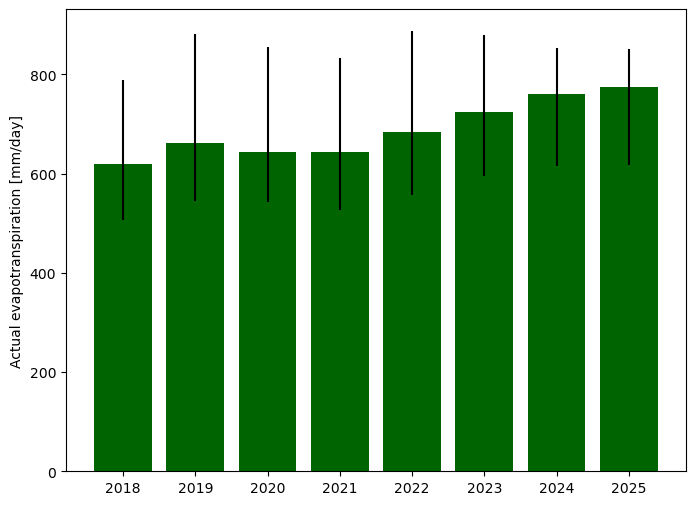

In [48]:
y = test['Actual Evaporation [mm/season]'].values
ymin = test['min'].values
ymax = test['max'].values

lower = y - ymin
upper = ymax - y

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(test.index, y, color='darkgreen')
ax.errorbar(test.index, y, yerr=[lower, upper], fmt='none', color='black')
ax.set_ylabel('Actual evapotranspiration [mm/day]')


In [24]:
#delete columns from df_new

df_new=df_new[['CUL_ID_x', 'geometry','year', 'status',
       'pct_diff_from_P80_avg', 'pct_diff_from_P95_avg',
       'Growth variability [%]']]

df_new

,CUL_ID_x,geometry,year,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%]
0,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2019,non-bearing,-59.523128,-66.236241,NaN
1,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2020,non-bearing,-63.943578,-69.923557,NaN
2,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2021,non-bearing,-58.234834,-65.161611,NaN
3,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2022,non-bearing,-44.240021,-53.487846,NaN
4,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2023,non-bearing,-38.488617,-48.690316,NaN
...,...,...,...,...,...,...,...
4756,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2021,non-bearing,-42.710812,-52.212257,NaN
4757,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2022,non-bearing,-40.386891,-50.273760,NaN
4758,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2023,bearing,-25.107707,-37.528637,-37.528637
4759,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2024,bearing,-7.556971,-22.888701,-22.888701


In [25]:
df_long.duplicated(subset=['CUL_ID_x', 'year']).sum()


0

In [26]:
df_new = df_new[df_new['CUL_ID_x'].notna()]
df_long = df_long[df_long['CUL_ID_x'].notna()]

df_new['CUL_ID_x'] = df_new['CUL_ID_x'].astype(int)
df_long['CUL_ID_x'] = df_long['CUL_ID_x'].astype(int)

existing_ids = df_new['CUL_ID_x'].isin(df_long['CUL_ID_x'])
print(f"Found {existing_ids.sum()} matching IDs out of {len(df_new)}")


Found 2961 matching IDs out of 4761


In [27]:
df_geo = df_new.merge(
    df_long[['CUL_ID_x', 'year', 'Actual Evaporation [mm/season]']],
    on=['CUL_ID_x', 'year'],
    how='left'
)

df_geo

,CUL_ID_x,geometry,year,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%],Actual Evaporation [mm/season]
0,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2019,non-bearing,-59.523128,-66.236241,NaN,NaN
1,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2020,non-bearing,-63.943578,-69.923557,NaN,NaN
2,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2021,non-bearing,-58.234834,-65.161611,NaN,NaN
3,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2022,non-bearing,-44.240021,-53.487846,NaN,NaN
4,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2023,non-bearing,-38.488617,-48.690316,NaN,NaN
...,...,...,...,...,...,...,...,...
4756,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2021,non-bearing,-42.710812,-52.212257,NaN,632.820359
4757,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2022,non-bearing,-40.386891,-50.273760,NaN,678.405364
4758,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2023,bearing,-25.107707,-37.528637,-37.528637,711.520201
4759,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2024,bearing,-7.556971,-22.888701,-22.888701,759.771572


In [31]:
df_geo['Actual Evaporation [mm/season]'] = df_geo['Actual Evaporation [mm/season]'].where(df_geo['status']!='non-bearing','non-bearing')
df_geo

,CUL_ID_x,geometry,year,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%],Actual Evaporation [mm/season]
0,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2019,non-bearing,-59.523128,-66.236241,NaN,non-bearing
1,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2020,non-bearing,-63.943578,-69.923557,NaN,non-bearing
2,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2021,non-bearing,-58.234834,-65.161611,NaN,non-bearing
3,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2022,non-bearing,-44.240021,-53.487846,NaN,non-bearing
4,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2023,non-bearing,-38.488617,-48.690316,NaN,non-bearing
...,...,...,...,...,...,...,...,...
4756,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2021,non-bearing,-42.710812,-52.212257,NaN,non-bearing
4757,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2022,non-bearing,-40.386891,-50.273760,NaN,non-bearing
4758,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2023,bearing,-25.107707,-37.528637,-37.528637,711.520201
4759,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2024,bearing,-7.556971,-22.888701,-22.888701,759.771572


In [32]:
df_geo['Actual Evaporation [mm/season]']

0       non-bearing
1       non-bearing
2       non-bearing
3       non-bearing
4       non-bearing
           ...     
4756    non-bearing
4757    non-bearing
4758     711.520201
4759     759.771572
4760     750.192132
Name: Actual Evaporation [mm/season], Length: 4761, dtype: object

In [33]:
float_rows = df_geo['Actual Evaporation [mm/season]'][df_geo['Actual Evaporation [mm/season]'].apply(lambda x: isinstance(x, float))]

float_rows

5              NaN
11             NaN
17             NaN
23             NaN
65             NaN
           ...    
4752    726.993602
4753    747.306418
4758    711.520201
4759    759.771572
4760    750.192132
Name: Actual Evaporation [mm/season], Length: 2068, dtype: object

In [35]:
# Your GeoDataFrame must have these columns
# - 'geometry' (valid geometries)
# - 'year'
# - 'pct_diff_from_P95_avg'

from folium import Element
import json

# Get center of map from entire dataset
centroids = df_new.geometry.centroid
lat = centroids.y.max()
lon = centroids.x.max()

# Create base map
m = folium.Map(location=[lat, lon], zoom_start=13, tiles="CartoDB positron")

# Colormap setup
all_values = df_geo['Actual Evaporation [mm/season]']
colormap = cm.linear.RdYlBu_11.scale(float_rows.min(), float_rows.max())
colormap.caption = "Actual Evapotranspiration [mm/season]"
colormap.add_to(m)

# Dictionary to keep layers by year
year_layers = {}

for year in sorted(df_new['year'].unique()):
    filtered = df_geo[df_geo['year'] == year]
    # Filter out problematic types
    filtered_clean = filtered.copy()

    # Drop columns with object or method types
    for col in filtered_clean.columns:
        if filtered_clean[col].apply(lambda x: isinstance(x, (dict, list, set, tuple, complex, type(filtered_clean[col])))).any():
            print(f"Dropping problematic column: {col}")
            filtered_clean.drop(columns=col, inplace=True)

    # Convert to JSON
    geojson_data = json.loads(filtered_clean.to_json())


    print(f"Year: {year}, Features: {len(filtered)}")

    layer = folium.FeatureGroup(name=str(year), show=False)

    #geojson_data = json.loads(filtered.to_json())  # Ensures correct format

    folium.GeoJson(
        data=geojson_data,
        name=f"Fields {year}",
        style_function=lambda feature: {
            'fillColor': colormap(feature['properties']['Actual Evaporation [mm/season]'])
            if isinstance(feature['properties']['Actual Evaporation [mm/season]'], (int, float))
            else 'white',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=["Actual Evaporation [mm/season]"])
    ).add_to(layer)

    # Add this:
    layer.add_to(m)
    year_layers[year] = layer

# Activate only the first year
first_year = sorted(year_layers.keys())[0]
m.add_child(year_layers[first_year])
#year_layers[first_year].show = True

# Layer control
folium.LayerControl(collapsed=False).add_to(m)

# Create the dropdown HTML separately
dropdown_options = ''.join([f'<option value="{year}">{year}</option>' for year in sorted(year_layers.keys())])

dropdown_script = """
<select id="yearDropdown" onchange="switchYear(this.value)"
        style="position: fixed; top: 10px; left: 50px; z-index: 9999;">
  {options}
</select>

<script>
    function switchYear(year) {{
        const yearLayers = {years};
        map.eachLayer(function(layer) {{
            if (layer.options && layer.options.name && yearLayers.includes(layer.options.name)) {{
                if (layer.options.name === year) {{
                    map.addLayer(layer);
                }} else {{
                    map.removeLayer(layer);
                }}
            }}
        }});
    }}
</script>
""".format(
    options=dropdown_options,
    years=str([str(y) for y in year_layers.keys()])  # safely embed year list as JS array
)

# Add to map
m.get_root().html.add_child(Element(dropdown_script))
m.save(r"C:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\HTML\ET_actual.html")


C:\Users\ici-1\AppData\Local\Temp\ipykernel_7532\2862415026.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = df_new.geometry.centroid


Year: 2019, Features: 723
Year: 2020, Features: 723
Year: 2021, Features: 723
Year: 2022, Features: 723
Year: 2023, Features: 723
Year: 2024, Features: 723
Year: 2025, Features: 423


# Crop stress normalized

In [26]:
df_stress = pd.read_csv(r'c:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\output\stress_normalized.csv', index_col=0)


In [27]:
df_stress.head()

,4099637,4099686,4099693,4646223,4646224,4646229,4646232,4646233,4646242,4646243,...,6823927,6823928,6823929,6823932,6823933,6823934,6823938,6823942,6823943,6823944
year,,,,,,,,,,,,,,,,,,,,,
2018,0.520906,0.555784,0.401166,0.452096,0.497319,0.232749,0.413022,0.289944,1.000000,0.787519,...,0.472689,0.495549,0.048696,0.272767,0.328438,0.363204,0.385372,0.374625,0.387459,0.201007
2019,0.687306,0.742529,0.517254,0.450996,0.510918,0.290896,0.424633,0.311332,0.507706,0.721181,...,0.724148,0.870284,0.585095,0.754611,0.834997,0.842258,0.793379,0.769587,0.718135,0.788611
2020,0.737580,0.854646,0.383601,1.000000,1.000000,1.000000,1.000000,1.000000,0.913005,1.000000,...,0.417100,0.080900,0.126216,0.288680,0.247213,0.388122,0.302761,0.220026,0.339139,0.407937
2021,1.000000,1.000000,0.598837,0.726913,0.697787,0.258231,0.373039,0.246844,0.220060,0.305083,...,0.545341,0.614319,0.320111,0.565428,0.578524,0.579040,0.551952,0.471257,0.528056,0.475384
2022,0.908237,0.943524,1.000000,0.451133,0.465163,0.300465,0.394873,0.301282,0.297782,0.399637,...,0.787123,0.844758,0.754506,0.762541,0.953302,0.835679,0.924641,0.830939,0.810376,0.868707


In [28]:
# Step 1: Melt wide dataframe into long format
df_stress_long = df_stress.reset_index().melt(id_vars='year', var_name='CUL_ID_x', value_name='Stress normalized [-]')

# df_long
df_stress_long.head()

,year,CUL_ID_x,Stress normalized [-]
0,2018,4099637,0.520906
1,2019,4099637,0.687306
2,2020,4099637,0.737580
3,2021,4099637,1.000000
4,2022,4099637,0.908237


In [29]:
df_stress_long.shape

(3384, 3)

In [30]:
df_stress_long['CUL_ID_x'] = df_stress_long['CUL_ID_x'].astype(int)

df_geo2 = df_geo.merge(df_stress_long, on='CUL_ID_x', how='left')

df_geo2.shape

(29172, 10)

In [31]:

df_geo2

,CUL_ID_x,geometry,year_x,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%],Actual Evaporation [mm/season],year_y,Stress normalized [-]
0,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2018,non-bearing,-52.789807,-60.966289,non-bearing,non-bearing,NaN,NaN
1,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2019,non-bearing,-58.961587,-66.069159,non-bearing,non-bearing,NaN,NaN
2,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2020,non-bearing,-63.443363,-69.774722,non-bearing,non-bearing,NaN,NaN
3,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2021,non-bearing,-57.655420,-64.989211,non-bearing,non-bearing,NaN,NaN
4,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2022,non-bearing,-43.466456,-53.257678,non-bearing,non-bearing,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
29167,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2025,bearing,-4.667171,-21.178163,-21.178163,759.183705,2021.0,0.862575
29168,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2025,bearing,-4.667171,-21.178163,-21.178163,759.183705,2022.0,1.000000
29169,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2025,bearing,-4.667171,-21.178163,-21.178163,759.183705,2023.0,0.619832
29170,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2025,bearing,-4.667171,-21.178163,-21.178163,759.183705,2024.0,0.045826


In [32]:
# Your GeoDataFrame must have these columns
# - 'geometry' (valid geometries)
# - 'year'
# - 'pct_diff_from_P95_avg'

from folium import Element
import json

# Get center of map from entire dataset
centroids = df_new.geometry.centroid
lat = centroids.y.max()
lon = centroids.x.max()

# Create base map
m = folium.Map(location=[lat, lon], zoom_start=13, tiles="CartoDB positron")

# Colormap setup
all_values = df_geo2['Stress normalized [-]']
colormap = cm.linear.RdYlGn_11.scale(all_values.min(), all_values.max())
colormap.caption = "Stress normalized [-]"
colormap.add_to(m)

# Dictionary to keep layers by year
year_layers = {}

for year in sorted(df_new['year'].unique()):
    filtered = df_geo2[df_geo2['year_y'] == year]

    # Filter out problematic types
    filtered_clean = filtered.copy()

    # Drop columns with object or method types
    for col in filtered_clean.columns:
        if filtered_clean[col].apply(lambda x: isinstance(x, (dict, list, set, tuple, complex, type(filtered_clean[col])))).any():
            print(f"Dropping problematic column: {col}")
            filtered_clean.drop(columns=col, inplace=True)

    # Convert to JSON
    geojson_data = json.loads(filtered_clean.to_json())


    print(f"Year: {year}, Features: {len(filtered)}")

    layer = folium.FeatureGroup(name=str(year), show=False)

    #geojson_data = json.loads(filtered.to_json())  # Ensures correct format

    folium.GeoJson(
        data=geojson_data,
        name=f"Fields {year}",
        style_function=lambda feature: {
            'fillColor': colormap(feature['properties']['Stress normalized [-]'])
            if isinstance(feature['properties']['Stress normalized [-]'], (int, float))
            else 'white',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=['Stress normalized [-]'])
    ).add_to(layer)

    # Add this:
    layer.add_to(m)
    year_layers[year] = layer

# Activate only the first year
first_year = sorted(year_layers.keys())[0]
m.add_child(year_layers[first_year])
#year_layers[first_year].show = True

# Layer control
folium.LayerControl(collapsed=False).add_to(m)

# Create the dropdown HTML separately
dropdown_options = ''.join([f'<option value="{year}">{year}</option>' for year in sorted(year_layers.keys())])

dropdown_script = """
<select id="yearDropdown" onchange="switchYear(this.value)"
        style="position: fixed; top: 10px; left: 50px; z-index: 9999;">
  {options}
</select>

<script>
    function switchYear(year) {{
        const yearLayers = {years};
        map.eachLayer(function(layer) {{
            if (layer.options && layer.options.name && yearLayers.includes(layer.options.name)) {{
                if (layer.options.name === year) {{
                    map.addLayer(layer);
                }} else {{
                    map.removeLayer(layer);
                }}
            }}
        }});
    }}
</script>
""".format(
    options=dropdown_options,
    years=str([str(y) for y in year_layers.keys()])  # safely embed year list as JS array
)

# Add to map
m.get_root().html.add_child(Element(dropdown_script))
m.save(r"C:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\HTML\stress_normalized.html")


C:\Users\ici-1\AppData\Local\Temp\ipykernel_13472\4205981268.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = df_new.geometry.centroid


Year: 2018, Features: 3384
Year: 2019, Features: 3384
Year: 2020, Features: 3384
Year: 2021, Features: 3384
Year: 2022, Features: 3384
Year: 2023, Features: 3384
Year: 2024, Features: 3384
Year: 2025, Features: 3384
